In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Positions des utilisateurs
users = np.array([
    [1, 1],
    [3, 5],
    [7, 8],
    [9, 2]
])

# Fonction objectif (minimiser le négatif pour Jaya)
def wifi_signal_loss(X):
    router_x, router_y = X
    distances = np.linalg.norm(users - np.array([router_x, router_y]), axis=1)
    return -np.sum(1 / (distances**2 + 1e-5))

# Jaya Algorithm avec suivi de convergence
def jaya_with_curve(func, dim=2, pop_size=20, iterations=50, bounds=(0,10)):
    lower, upper = bounds
    pop = np.random.uniform(lower, upper, (pop_size, dim))
    fitness = np.array([func(ind) for ind in pop])

    convergence_curve = []

    for t in range(iterations):
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)
        best, worst = pop[best_idx], pop[worst_idx]

        for i in range(pop_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            new_sol = pop[i] + r1*(best - abs(pop[i])) - r2*(worst - abs(pop[i]))
            new_sol = np.clip(new_sol, lower, upper)
            new_fit = func(new_sol)
            if new_fit < fitness[i]:
                pop[i], fitness[i] = new_sol, new_fit

        # Stocker le meilleur signal moyen actuel
        convergence_curve.append(-fitness[best_idx])

    best_idx = np.argmin(fitness)
    return pop[best_idx], -fitness[best_idx], convergence_curve


In [3]:
best_position, best_signal, curve = jaya_with_curve(wifi_signal_loss)

print("✅ Meilleure position pour le routeur:", best_position)
print("🎯 Signal moyen max:", best_signal)


✅ Meilleure position pour le routeur: [6.97832996 8.036152  ]
🎯 Signal moyen max: 559.8119728034995


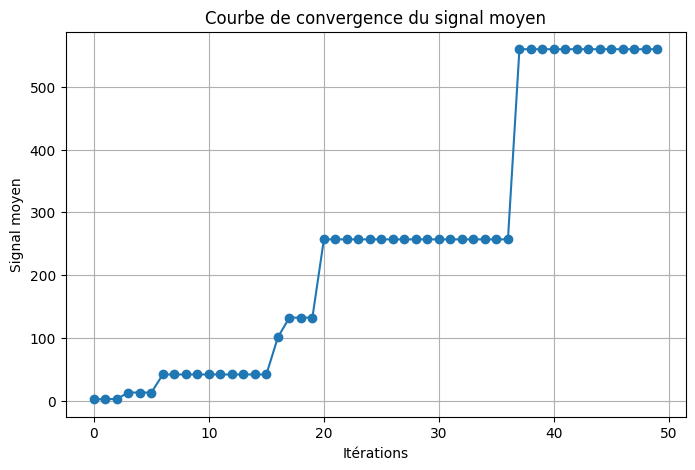

In [4]:
plt.figure(figsize=(8,5))
plt.plot(curve, marker='o')
plt.title("Courbe de convergence du signal moyen")
plt.xlabel("Itérations")
plt.ylabel("Signal moyen")
plt.grid(True)
plt.show()


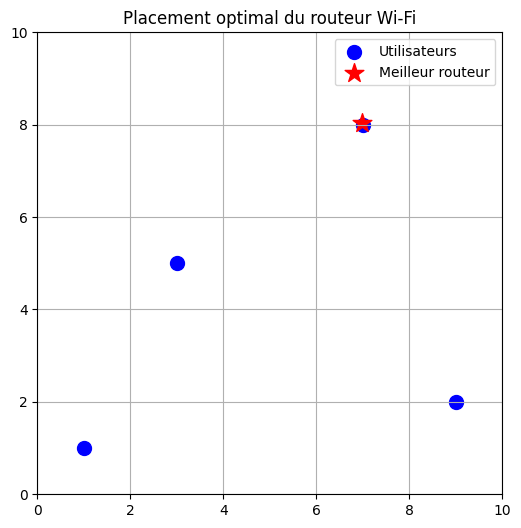

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(users[:,0], users[:,1], c='blue', s=100, label='Utilisateurs')
plt.scatter(best_position[0], best_position[1], c='red', s=200, label='Meilleur routeur', marker='*')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Placement optimal du routeur Wi-Fi")
plt.legend()
plt.grid(True)
plt.show()
